<a href="https://colab.research.google.com/github/CosentinoFacu/BLINK-LED-MICROPYTHON/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
import random
from matplotlib.colors import ListedColormap

np.set_printoptions(suppress=True)

In [2]:
tmuestras = 200
clases = 5
muestras = np.array(  [[-0.9118404218 ,-0.1248241513  , 1],   
                      [-0.9118404218  ,-0.1248241513  , 1],
                      [-0.9409335471	,-0.0584220945  , 1],
                      [-0.9721073134	,-0.07585272834 , 1],
                      [-0.7632304408	,-0.04015564927 , 1],
                      [-0.8124212591	,-0.0781940697  , 1],
                      [-0.7136956468	,-0.1381971885  , 1],
                      [-0.8512302226	,-0.05959761213 , 1],
                      [-0.7226197683	,-0.1305462827  , 1],
                      [-0.8546472468	,-0.1443878509  , 1],
                      [-0.7344238538	,-0.1306159841  , 1],
                      [-0.8516623988	,-0.04637356375 , 1],
                      [-0.9518898012	,-0.1013800898  , 1],
                      [-0.9571408503	,-0.1022983806  , 1],
                      [-0.8734442484	,-0.1016630056  , 1],
                      [-0.916829959	  ,-0.0855764081  , 1],
                      [-0.8939101896	,-0.1248466656  , 1],
                      [-0.9781798449	,-0.05683856669 , 1],
                      [-0.9575094015	,-0.09597258458 , 1],
                      [-0.9439316097	,-0.1077617518  , 1],
                      [-0.9961038444	,0.100382376    , 1],
                      [-0.7720013608	,0.05027496998  , 1],
                      [-0.7050219363	,0.04983718018  , 1],
                      [-0.9734086394	,0.05737616091  , 1],
                      [-0.9994595821	,0.05435966013  , 1],
                      [-0.8167047604	,0.1238738864   , 1],
                      [-0.8846504799	,0.005260882425 , 1],
                      [-0.9312692656	,0.06510121707  , 1],
                      [-0.9694245783	,0.09153801451  , 1],
                      [-0.8091642494	,0.1302446881   , 1],
                      [-0.7825593776	,0.06299420101  , 1],
                      [-0.9551007665	,0.08085099749  , 1],
                      [-0.7068727997	,0.0471555478   , 1],
                      [-0.7191126901	,0.1132528504   , 1],
                      [-0.7918388056	,0.106439089    , 1],
                      [-0.7638203955	,0.0368636318   , 1],
                      [-0.9908293255	,0.02503791425  , 1],
                      [-0.9636786576	,0.09367006391  , 1],
                      [-0.8351903354	,0.1347919617   , 1],
                      [-0.9136988986	,0.04892772836  , 1],
                      [0.8516530161	  ,0.1457441919   , 2],
                      [0.8002566315	  ,0.06369962286  , 2],
                      [0.7914505283	  ,0.09632639872  , 2],
                      [0.7689120849	  ,0.1006783549   , 2],
                      [0.8333342649	  ,0.03714215545  , 2],
                      [0.8431452619	  ,0.111685064    , 2],
                      [0.8629549291	  ,0.09107090631  , 2],
                      [0.7489846812	  ,0.141372347    , 2],
                      [0.9629511517	  ,0.1299207315   , 2],
                      [0.7205093003	  ,0.02840976609  , 2],
                      [0.8244390827	  ,0.0998401098   , 2],
                      [0.867469773	  ,0.119702908    , 2],
                      [0.9820944161	  ,0.1141123736   , 2],
                      [0.9323100036	  ,0.05486416285  , 2],
                      [0.941568549	  ,0.02447047438  , 2],
                      [0.8834180965	  ,0.02755639747  , 2],
                      [0.7490564367	  ,0.04157257029  , 2],
                      [0.7580921699	  ,0.1057807844   , 2],
                      [0.8913737235	  ,0.09937856305  , 2],
                      [0.97852028	    ,0.1184559023   , 2],
                      [0.9694019294	  ,-0.0186898926  , 2],
                      [0.9091357584	  ,-0.05748546608 , 2],
                      [0.7776555398	  ,-0.005604951222, 2],
                      [0.8945463186	  ,-0.0001529087597,2],
                      [0.8033856079	  ,-0.103863568   , 2],
                      [0.7778120498	  ,-0.04129848649 , 2],
                      [0.9963689454	  ,-0.02548914866 , 2],
                      [0.8615671327	  ,-0.008982804093, 2],
                      [0.9075868384	  ,-0.1054868527  , 2],
                      [0.7751812687	  ,-0.03484252793 , 2],
                      [0.7645553221	  ,-0.1190409908  , 2],
                      [0.9841181606	  ,-0.1051915908  , 2],
                      [0.8922523744	  ,-0.1183130861  , 2],
                      [0.7305835343	  ,-0.1431749135  , 2],
                      [0.9614536371	  ,-0.0319312032  , 2],
                      [0.7836175261	  ,-0.03347063462 , 2],
                      [0.9968342968	  ,-0.08915745717 , 2],
                      [0.8815647873	  ,-0.05965952682 , 2],
                      [0.9123536075	  ,-0.1098189359  , 2],
                      [0.9483783121	  ,-0.1214029568  , 2],
                      [-0.00204076459	,-0.8661974451  , 3],
                      [-0.08728146744	,-0.8110673614  , 3],
                      [-0.05872859901	,-0.7191421188  , 3],
                      [-0.0138945949	,-0.8665668173  , 3],
                      [-0.08508479383	,-0.8176708385  , 3],
                      [-0.1302720241	,-0.8724796711  , 3],
                      [-0.01067934989	,-0.7414378332  , 3],
                      [-0.06046567929	,-0.9713644129  , 3],
                      [-0.1271607994	,-0.7235637735  , 3],
                      [-0.02791726534	,-0.9992634923  , 3],
                      [-0.01063344403	,-0.842766492   , 3],
                      [-0.07969935727	,-0.9342541455  , 3],
                      [-0.06210919045	,-0.7242484232  , 3],
                      [-0.1293995073	,-0.7353947634  , 3],
                      [-0.01450181033	,-0.804410633   , 3],
                      [-0.08096689095	,-0.7140577457  , 3],
                      [-0.01251802234	,-0.714570285   , 3],
                      [-0.142784374	  ,-0.8337107074  , 3],
                      [-0.02615736062	,-0.8392095712  , 3],
                      [0.05455122227	,-0.9705124161  , 3],
                      [0.0123504727	  ,-0.9546905217  , 3],
                      [0.02335444176	,-0.8997865111  , 3],
                      [0.04718148099	,-0.7916476317  , 3],
                      [0.06163081568	,-0.7182484956  , 3],
                      [-0.01251705234	,-0.714570286   , 3],
                      [0.1045121358	  ,-0.8892980927  , 3],
                      [0.1061059394	  ,-0.8110745727  , 3],
                      [0.0712294379	  ,-0.812628966   , 3],
                      [0.1337395589	  ,-0.7203622232  , 3],
                      [0.142069735	  ,-0.8878356586  , 3],
                      [0.01917460234	,-0.7376520528  , 3],
                      [0.1045439735	  ,-0.7205630175  , 3],
                      [0.1071161816	  ,-0.8999314673  , 3],
                      [0.07013380005	,-0.8025684272  , 3],
                      [0.1168610111	  ,-0.8144578427  , 3],
                      [0.01909747634	,-0.8815761892  , 3],
                      [0.1122298212	  ,-0.7229197206  , 3],
                      [0.1020879503	  ,-0.8765790896  , 3],
                      [0.04626755386	,-0.8665599962  , 3],
                      [0.1307318413	  ,-0.7159817401  , 3],
                      [0.1320788067	  ,0.8408634192   , 4],
                      [0.02645471927	,0.7278491014   , 4],
                      [0.06033846857	,0.8312200235   , 4],
                      [0.04149119519	,0.7344188091   , 4],
                      [0.08460779403	,0.8407296006   , 4],
                      [0.1392328235	  ,0.8684952078   , 4],
                      [0.1123111889	  ,0.9710899371   , 4],
                      [0.04310651818	,0.7630629286   , 4],
                      [0.07477401629	,0.7045185156   , 4],
                      [0.09102319417	,0.9735145327   , 4],
                      [0.1122415652	  ,0.9802043075   , 4],
                      [0.1472921482	  ,0.8305518593   , 4],
                      [0.1004163152	  ,0.7993580278   , 4],
                      [0.1186810485	  ,0.9984549299   , 4],
                      [0.04535724394	,0.750285656    , 4],
                      [0.03815302463	,0.7361252962   , 4],
                      [0.03314133034	,0.8929689485   , 4],
                      [0.04758861686	,0.7347477108   , 4],
                      [0.1445228692	  ,0.9472320339   , 4],
                      [-0.1325775471	,0.8530970192   , 4],
                      [-0.0809391236	,0.8708581017   , 4],
                      [-0.05293814385	,0.8604416989   , 4],
                      [-0.125067532	  ,0.8985839887   , 4],
                      [-0.1360046928	,0.9595960619   , 4],
                      [-0.07317615494	,0.7427706044   , 4],
                      [-0.006647171575,0.7668198947   , 4],
                      [-0.1296291824	,0.708188734    , 4],
                      [-0.04340517303	,0.7497666085   , 4],
                      [-0.1409865553	,0.9716747295   , 4],
                      [-0.110698026	  ,0.9342843923   , 4],
                      [-0.09351252691	,0.8707390579   , 4],
                      [-0.05870506008	,0.8112633998   , 4],
                      [-0.09689314398	,0.7803299816   , 4],
                      [-0.1278008623	,0.8675162291   , 4],
                      [-0.02733622987	,0.8540794867   , 4],
                      [-0.09020655873	,0.702438128    , 4],
                      [-0.1467377542  ,0.83414137     , 4],
                      [-0.09689314398	,0.7803299816   , 4],
                      [-0.06632455052	,0.9334130597   , 4],
                      [-0.07346203714 ,0.8842620164   , 4],
                      [0.067667264	  ,0.010728606    , 5],
                      [0.022990198	  ,0.121649566    , 5],
                      [0.145842842	  ,0.106417819    , 5],
                      [0.135331941	  ,0.051287296    , 5],
                      [0.176295729	  ,0.090787667    , 5],
                      [0.09643258	    ,0.162810565    , 5],
                      [0.04311704	    ,0.01571047     , 5],
                      [0.086189477	  ,0.184189328    , 5],
                      [0.019424889	  ,0.171493626    , 5],
                      [0.002925521	  ,-0.017322374   , 5],
                      [0.05699213	    ,-0.173449349   , 5],
                      [0.131840125	  ,-0.011708952   , 5],
                      [0.156747201	  ,-0.109324833   , 5],
                      [0.073933757	  ,-0.000281117   , 5],
                      [0.093705807	  ,-0.182389583   , 5],
                      [0.02395025	    ,-0.161243658   , 5],
                      [0.035308438	  ,-0.009176864   , 5],
                      [0.026305947	  ,-0.127495441   , 5],
                      [0.080926694	  ,-0.053288794   , 5],
                      [0.028371118	  ,-0.172887898   , 5],
                      [-0.090972337	  ,0.130428739    , 5],
                      [-0.108711345	  ,0.082869365    , 5],
                      [-0.060303757	  ,0.171968097    , 5],
                      [-0.000151	    ,0.029786851    , 5],
                      [-0.095537566	  ,0.129492365    , 5],
                      [-0.024566359	  ,0.19200201     , 5],
                      [-0.069904555	  ,0.11749866     , 5],
                      [-0.133623923	  ,0.019334764    , 5],
                      [-0.139805324	  ,0.107218352    , 5],
                      [-0.14361892	  ,0.12240712     , 5],
                      [-0.09644746	  ,-0.039466087   , 5],
                      [-0.016028864	  ,-0.091741194   , 5],
                      [-0.025879966	  ,-0.036634952   , 5],
                      [-0.082505625	  ,-0.170940888   , 5],
                      [-0.084100834	  ,-0.118125373   , 5],
                      [-0.173532141	  ,-0.084821537   , 5],
                      [-0.150496904	  ,-0.035873722   , 5],
                      [-0.123386903	  ,-0.076190617   , 5],
                      [-0.052425062	  ,-0.05129805    , 5],
                      [-0.083393524	  ,-0.077011422   , 5]]).reshape((tmuestras),3)

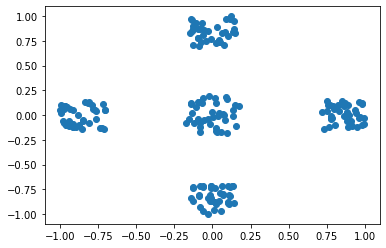

In [3]:
#Graficamos los datos
plt.scatter(muestras[:,0],muestras[:,1])
plt.show()

In [4]:
x1= int((tmuestras / clases))

X = muestras[:,:2]
X1 = muestras[:x1,:]
X2 = muestras[x1:x1*2,:]
X3 = muestras[x1*2:x1*3,:]
X4 = muestras[x1*3:x1*4,:]
X5 = muestras[x1*4:x1*5,:]

y = muestras[:,2].reshape(tmuestras,1)

'''
print(X1)
print("---------------------------------------")
print(X2)
print("---------------------------------------")
print(X3)
print("---------------------------------------")
print(X4)
print("---------------------------------------")
print(X5)
'''

'\nprint(X1)\nprint("---------------------------------------")\nprint(X2)\nprint("---------------------------------------")\nprint(X3)\nprint("---------------------------------------")\nprint(X4)\nprint("---------------------------------------")\nprint(X5)\n'

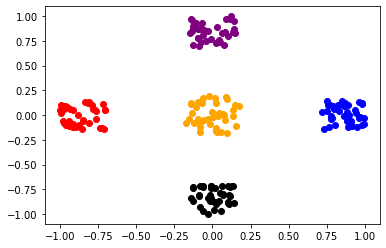

In [5]:
plt.scatter(X1[:,0],X1[:,1],marker='o',color='red')
plt.scatter(X2[:,0],X2[:,1],marker='o',color='blue')
plt.scatter(X3[:,0],X3[:,1],marker='o',color='black')
plt.scatter(X4[:,0],X4[:,1],marker='o',color='purple')
plt.scatter(X5[:,0],X5[:,1],marker='o',color='orange')

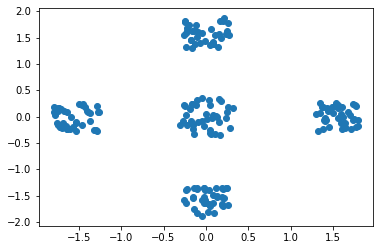

'\nmedia = sc.mean_\ndes_std = np.sqrt(sc.var_)\nprint(media)\nprint(des_std)\nprint(X_std[1,:])\nprint(X[1,:])\nprint((-0.91184042 + 0.00112202)/0.61907537)\n'

In [6]:
'''
Separamos datos en: - conjunto de entrenamiento
                    - y congunto de prueba

Normalizamos los datos
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1,stratify=y) 

'''
print(X_train)
print("--------------------")
print(X_test)
print("--------------------")
print(y_train)
print("--------------------")
print(y_test)
'''
sc=StandardScaler()
sc.fit(X)   #media y desviacion estandar de X

X_std=sc.transform(X)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

#Graficamos los datos normalizados

plt.scatter(X_std[:,0],X_std[:,1])
plt.show()
'''
media = sc.mean_
des_std = np.sqrt(sc.var_)
print(media)
print(des_std)
print(X_std[1,:])
print(X[1,:])
print((-0.91184042 + 0.00112202)/0.61907537)
'''


In [7]:
'''Funcion para calcular
la maxima distancia entre centros
'''

def maxdist(centros):
  #centros=np.random.rand(4,2)
  dist = list()
  mayor=0

  #print("-------------")
  #print(centros)
  #print("-------------")

  plt.scatter(centros[:,0],centros[:,1],marker='o',color='blue')

  for j in range(len(centros)):
    c0=centros[j,:].reshape(1,2)
    for i in range(len(centros)):
      c1=centros[i,:].reshape(1,2)
      aux=np.linalg.norm(c0-c1)
      if(aux > mayor):
        mayor=aux
        dist.append(aux)
        maxj=j
        maxi=i

  c0=centros[maxj,:]
  c1=centros[maxi,:]
  #print(c0)
  #print(c1)
  plt.plot([c0[0],c1[0]],[c0[1],c1[1]],color='black')
  return mayor

Los centros son:
[[-0.00742644  0.00076578]
 [-0.01039912  1.56644566]
 [-1.56241219 -0.03057819]
 [ 1.55789676  0.01021902]
 [ 0.02234098 -1.54685227]]
0.9868126664126793


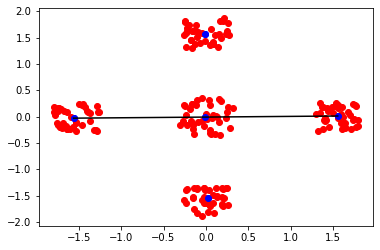

In [8]:
K = clases
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=300).fit(X_std)
centros=kmeans.cluster_centers_

print("Los centros son:")
print(centros)

epsilon=((maxdist(centros))/np.sqrt(2*K))
print(epsilon)

plt.scatter(X_std[:,0],X_std[:,1],marker='o',color='red')
plt.scatter(centros[:,0],centros[:,1],marker='o',color='blue')
plt.show()

In [9]:
'''
Creamos la matriz G, su psudoinversa y matrix de pesos W
'''
G=np.ones((tmuestras,K))

'''
a = (1, 2)
b = (4, 5)

print(centros[0])
print(X_std[0])

print(math.dist(centros[0],X_std[0]))

dif = math.dist(centros[0],X_std[0])
salida=np.exp((-1/(epsilon**2))*dif**2)

print(salida)
'''
for i in range(K):
  for j in range(tmuestras):
    dif = math.dist(centros[i],X_std[j])
    salida=np.exp((-1/(epsilon**2))*dif**2)
    G[j,i]=salida

print(G.shape)

G_inv=np.linalg.pinv(G)
W=np.dot(G_inv,y)
print(G.shape)
print(W.shape)



(200, 5)
(200, 5)
(5, 1)


In [11]:
i=0

'''print("El dato es:"+str(X[i]))
print("El dato es normalizado es:"+str(X_std[i]))
print("La pseudo muestra es:"+str(G[i]))
print("La columna de pesos es:"+str(W))
print("El producto de G por W es:"+str(np.round(np.dot(G[i],W))))
'''

#print("El producto de dato por W es:"+str((np.dot(data,W))))


'print("El dato es:"+str(X[i]))\nprint("El dato es normalizado es:"+str(X_std[i]))\nprint("La pseudo muestra es:"+str(G[i]))\nprint("La columna de pesos es:"+str(W))\nprint("El producto de G por W es:"+str(np.round(np.dot(G[i],W))))\n'

In [45]:
'''
Creamos red neuronal
'''

def redneuronal(x):
  print(x)
  Gp=np.ones((1,5))

  for i in range(5):
    #dif = math.dist(centros[i],x[0])
    dif = np.linalg.norm(centros[i]-x)
    print("centro",str(centros[i]),"punto",str(x),"distancia",str(dif))
    salida=np.exp((-1/(epsilon**2))*dif**2)
    Gp[0,i]=salida

  print(Gp)
  print(W)
  return np.dot(Gp[0],W)

  #data = np.array([xx1[0,54],xx2[0,54]]) 
print(np.array([xx1[0,54],xx2[0,54]]))
data = np.array([-0.92,-2]) 
print(data)
print(redneuronal(data))

print("--------------------------")
print(Z[0,54])

[-0.92 -2.  ]
[-0.92 -2.  ]
[-0.92 -2.  ]
centro [-0.00742644  0.00076578] punto [-0.92 -2.  ] distancia 2.199057570876978
centro [-0.01039912  1.56644566] punto [-0.92 -2.  ] distancia 3.6806125076475484
centro [-1.56241219 -0.03057819] punto [-0.92 -2.  ] distancia 2.0715491008500417
centro [1.55789676 0.01021902] punto [-0.92 -2.  ] distancia 3.190760550978731
centro [ 0.02234098 -1.54685227] punto [-0.92 -2.  ] distancia 1.0456334865038508
[[0.00697121 0.00000091 0.01219442 0.00002881 0.32537831]]
[[4.46437526]
 [3.79748546]
 [0.5845312 ]
 [1.64355848]
 [2.69977957]]
[0.91675065]
--------------------------
0.0


In [13]:
data = np.array([0.5, 1])

#resultado = redneuronal(data)
#print(resultado)
#plt.scatter(data[0],data[1])

In [25]:
def resultado(num_decimal,porcentaje):
    num_rodondeado = round(num_decimal)
    low = num_rodondeado * (1 - (porcentaje/100))
    up  = num_rodondeado * (1 + (porcentaje/100))
    if low <= num_decimal <= up:
        return num_rodondeado
    else:
        return 0

data = float(Z[10,10])

print([Z[10,10]])
print(data)
print(resultado(data,10))

[0.11154422567789232]
0.11154422567789232
0


[[-2.   -1.98 -1.96 ...  1.94  1.96  1.98]
 [-2.   -1.98 -1.96 ...  1.94  1.96  1.98]
 [-2.   -1.98 -1.96 ...  1.94  1.96  1.98]
 ...
 [-2.   -1.98 -1.96 ...  1.94  1.96  1.98]
 [-2.   -1.98 -1.96 ...  1.94  1.96  1.98]
 [-2.   -1.98 -1.96 ...  1.94  1.96  1.98]]
[[-2.   -2.   -2.   ... -2.   -2.   -2.  ]
 [-1.98 -1.98 -1.98 ... -1.98 -1.98 -1.98]
 [-1.96 -1.96 -1.96 ... -1.96 -1.96 -1.96]
 ...
 [ 1.94  1.94  1.94 ...  1.94  1.94  1.94]
 [ 1.96  1.96  1.96 ...  1.96  1.96  1.96]
 [ 1.98  1.98  1.98 ...  1.98  1.98  1.98]]
(200, 200)


(-2.0, 1.9800000000000035)

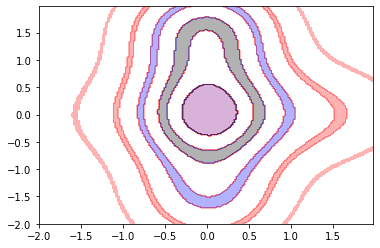

In [41]:
colors = (('white','red','blue','black','purple','orange'))
cmap = ListedColormap(colors[:len(np.unique(y))])
resolution=0.02

# representa la superficie de decisión 
x1_min, x1_max = -2,2
x2_min, x2_max = -2,2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
print(xx1)
print(xx2)

Z = np.zeros(xx1.shape)

print(Z.shape)

'''
for i in range(xx1.shape[0]):
  for j in range(xx1.shape[1]):
    data = np.array([xx1[i,j],xx2[i,j]]) 
    Z[i,j] = resultado(redneuronal(data),10)'''


Z = np.zeros(xx1.shape)

for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        data = np.array([xx1[i,j],xx2[i,j]]) 
        Z[i,j] = resultado(float(redneuronal(data)),5)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

In [28]:
import numpy as np

# Crear una matriz numpy
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Guardar la matriz en un archivo de texto
np.savetxt("matrix.csv", Z, delimiter="\t")